#  MACHINE LEARNING WATER POTABILITY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.expand_frame_repr', True)

df = pd.read_csv('dataset/water_potability.csv')
cols = list(df.columns)

print( "Colonne: ", cols, "\nSize: ", df.size)

Colonne:  ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'] 
Size:  32760


In [2]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [3]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


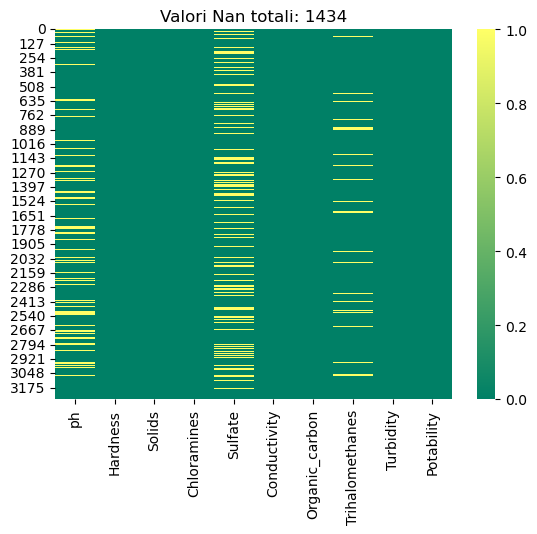

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
total_nan = df.isnull().sum().sum()
title = f"Valori Nan totali: {total_nan}"
sns.heatmap(data=df.isnull(), cmap='summer')
plt.title(title)
plt.show()
df.isnull().sum()

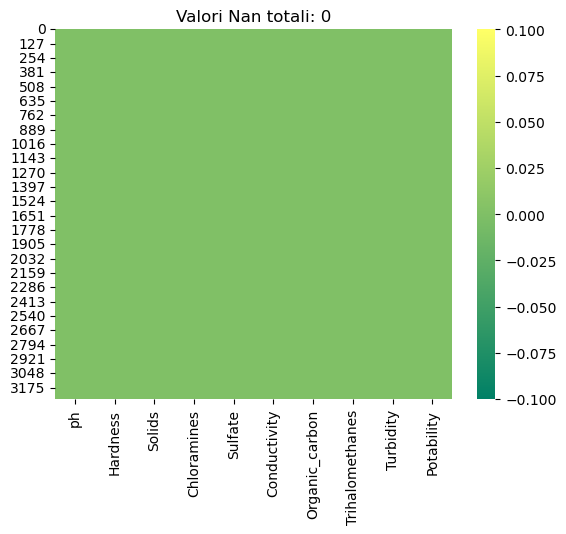

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.079136,196.369496,22014.092526,7.122277,333.413226,426.205111,14.284970,66.391032,3.966786,0.390110
std,1.532524,32.879761,8768.570828,1.583085,38.873943,80.824064,3.308162,15.976498,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.114968,176.850538,15666.690297,6.127421,310.103531,365.734414,12.065801,55.955335,3.439711,0.000000
50%,7.035894,196.967627,20927.833607,7.130299,333.173254,421.884968,14.218338,66.665028,3.955028,0.000000
75%,8.018787,216.667456,27332.762127,8.114887,357.230289,481.792304,16.557652,77.172997,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean')
filled_value = imputer.fit_transform(df)

filled_value= pd.DataFrame(filled_value)
filled_value = filled_value.set_axis(cols, axis=1)
filled_value['Potability'] = filled_value['Potability'].astype('uint8')

df = filled_value

total_nan = df.isnull().sum().sum()
title = f"Valori Nan totali: {total_nan}"
sns.heatmap(data=df.isnull(), cmap='summer')
plt.title(title)
plt.show()

df.describe()


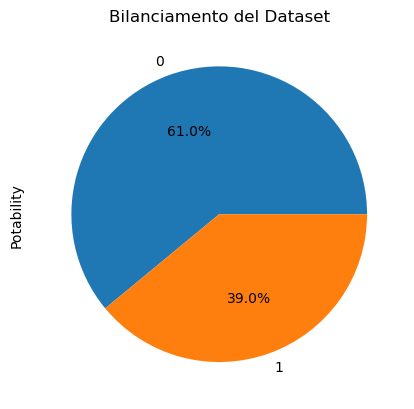

In [6]:
colors = sns.color_palette('pastel')[0:2]

(df['Potability'].value_counts() / len(df) * 100).plot.pie(autopct='%.1f%%')
plt.title("Bilanciamento del Dataset")
plt.show()

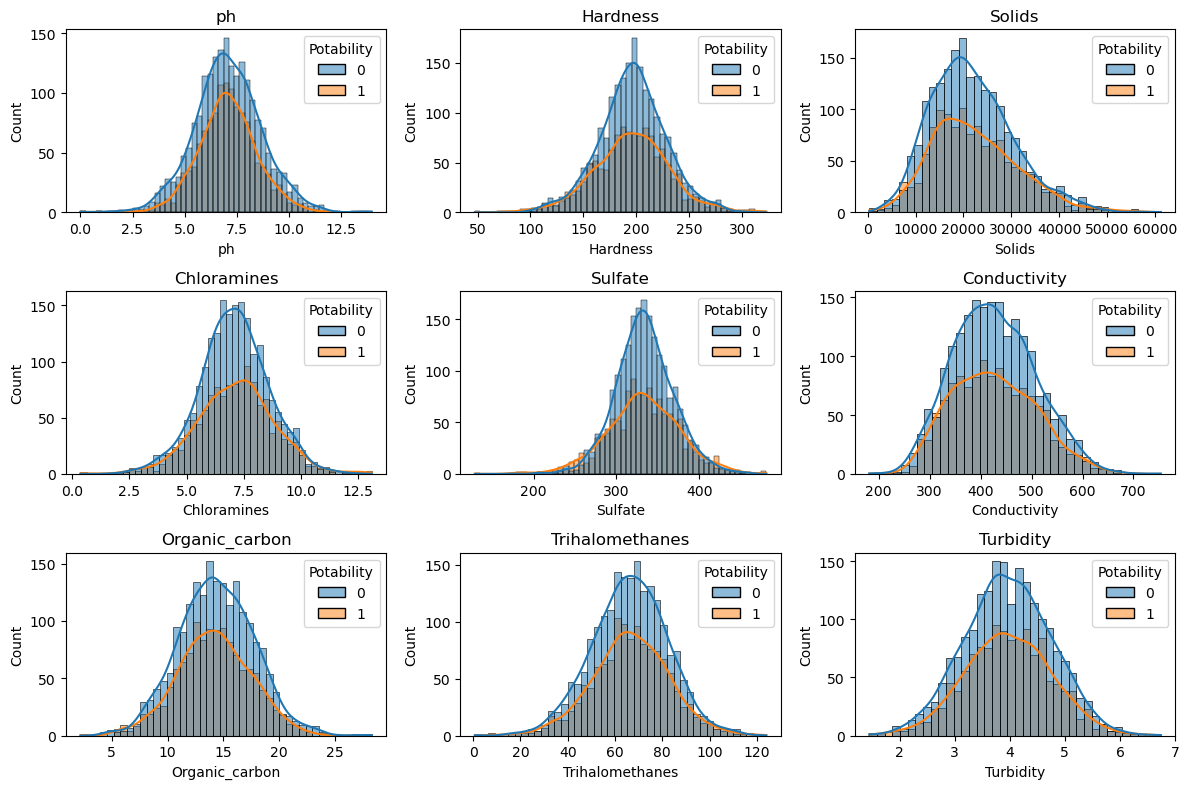

In [7]:
fig, axs = plt.subplots(3,3, figsize=(12,8))

sns.histplot(df, x='ph', hue='Potability', ax=axs[0,0], kde=True).set(title='ph')
sns.histplot(df, x='Hardness', hue='Potability', ax=axs[0,1], kde=True).set(title='Hardness')
sns.histplot(df, x='Solids', hue='Potability', ax=axs[0,2], kde=True).set(title='Solids')
sns.histplot(df, x='Chloramines', hue='Potability', ax=axs[1,0], kde=True).set(title='Chloramines')
sns.histplot(df, x='Sulfate', hue='Potability', ax=axs[1,1], kde=True).set(title='Sulfate')
sns.histplot(df, x='Conductivity', hue='Potability', ax=axs[1,2], kde=True).set(title='Conductivity')
sns.histplot(df, x='Organic_carbon', hue='Potability', ax=axs[2,0], kde=True).set(title='Organic_carbon')
sns.histplot(df, x='Trihalomethanes', hue='Potability', ax=axs[2,1], kde=True).set(title='Trihalomethanes')
sns.histplot(df, x='Turbidity', hue='Potability', ax=axs[2,2], kde=True).set(title='Turbidity')


plt.tight_layout()
plt.show()

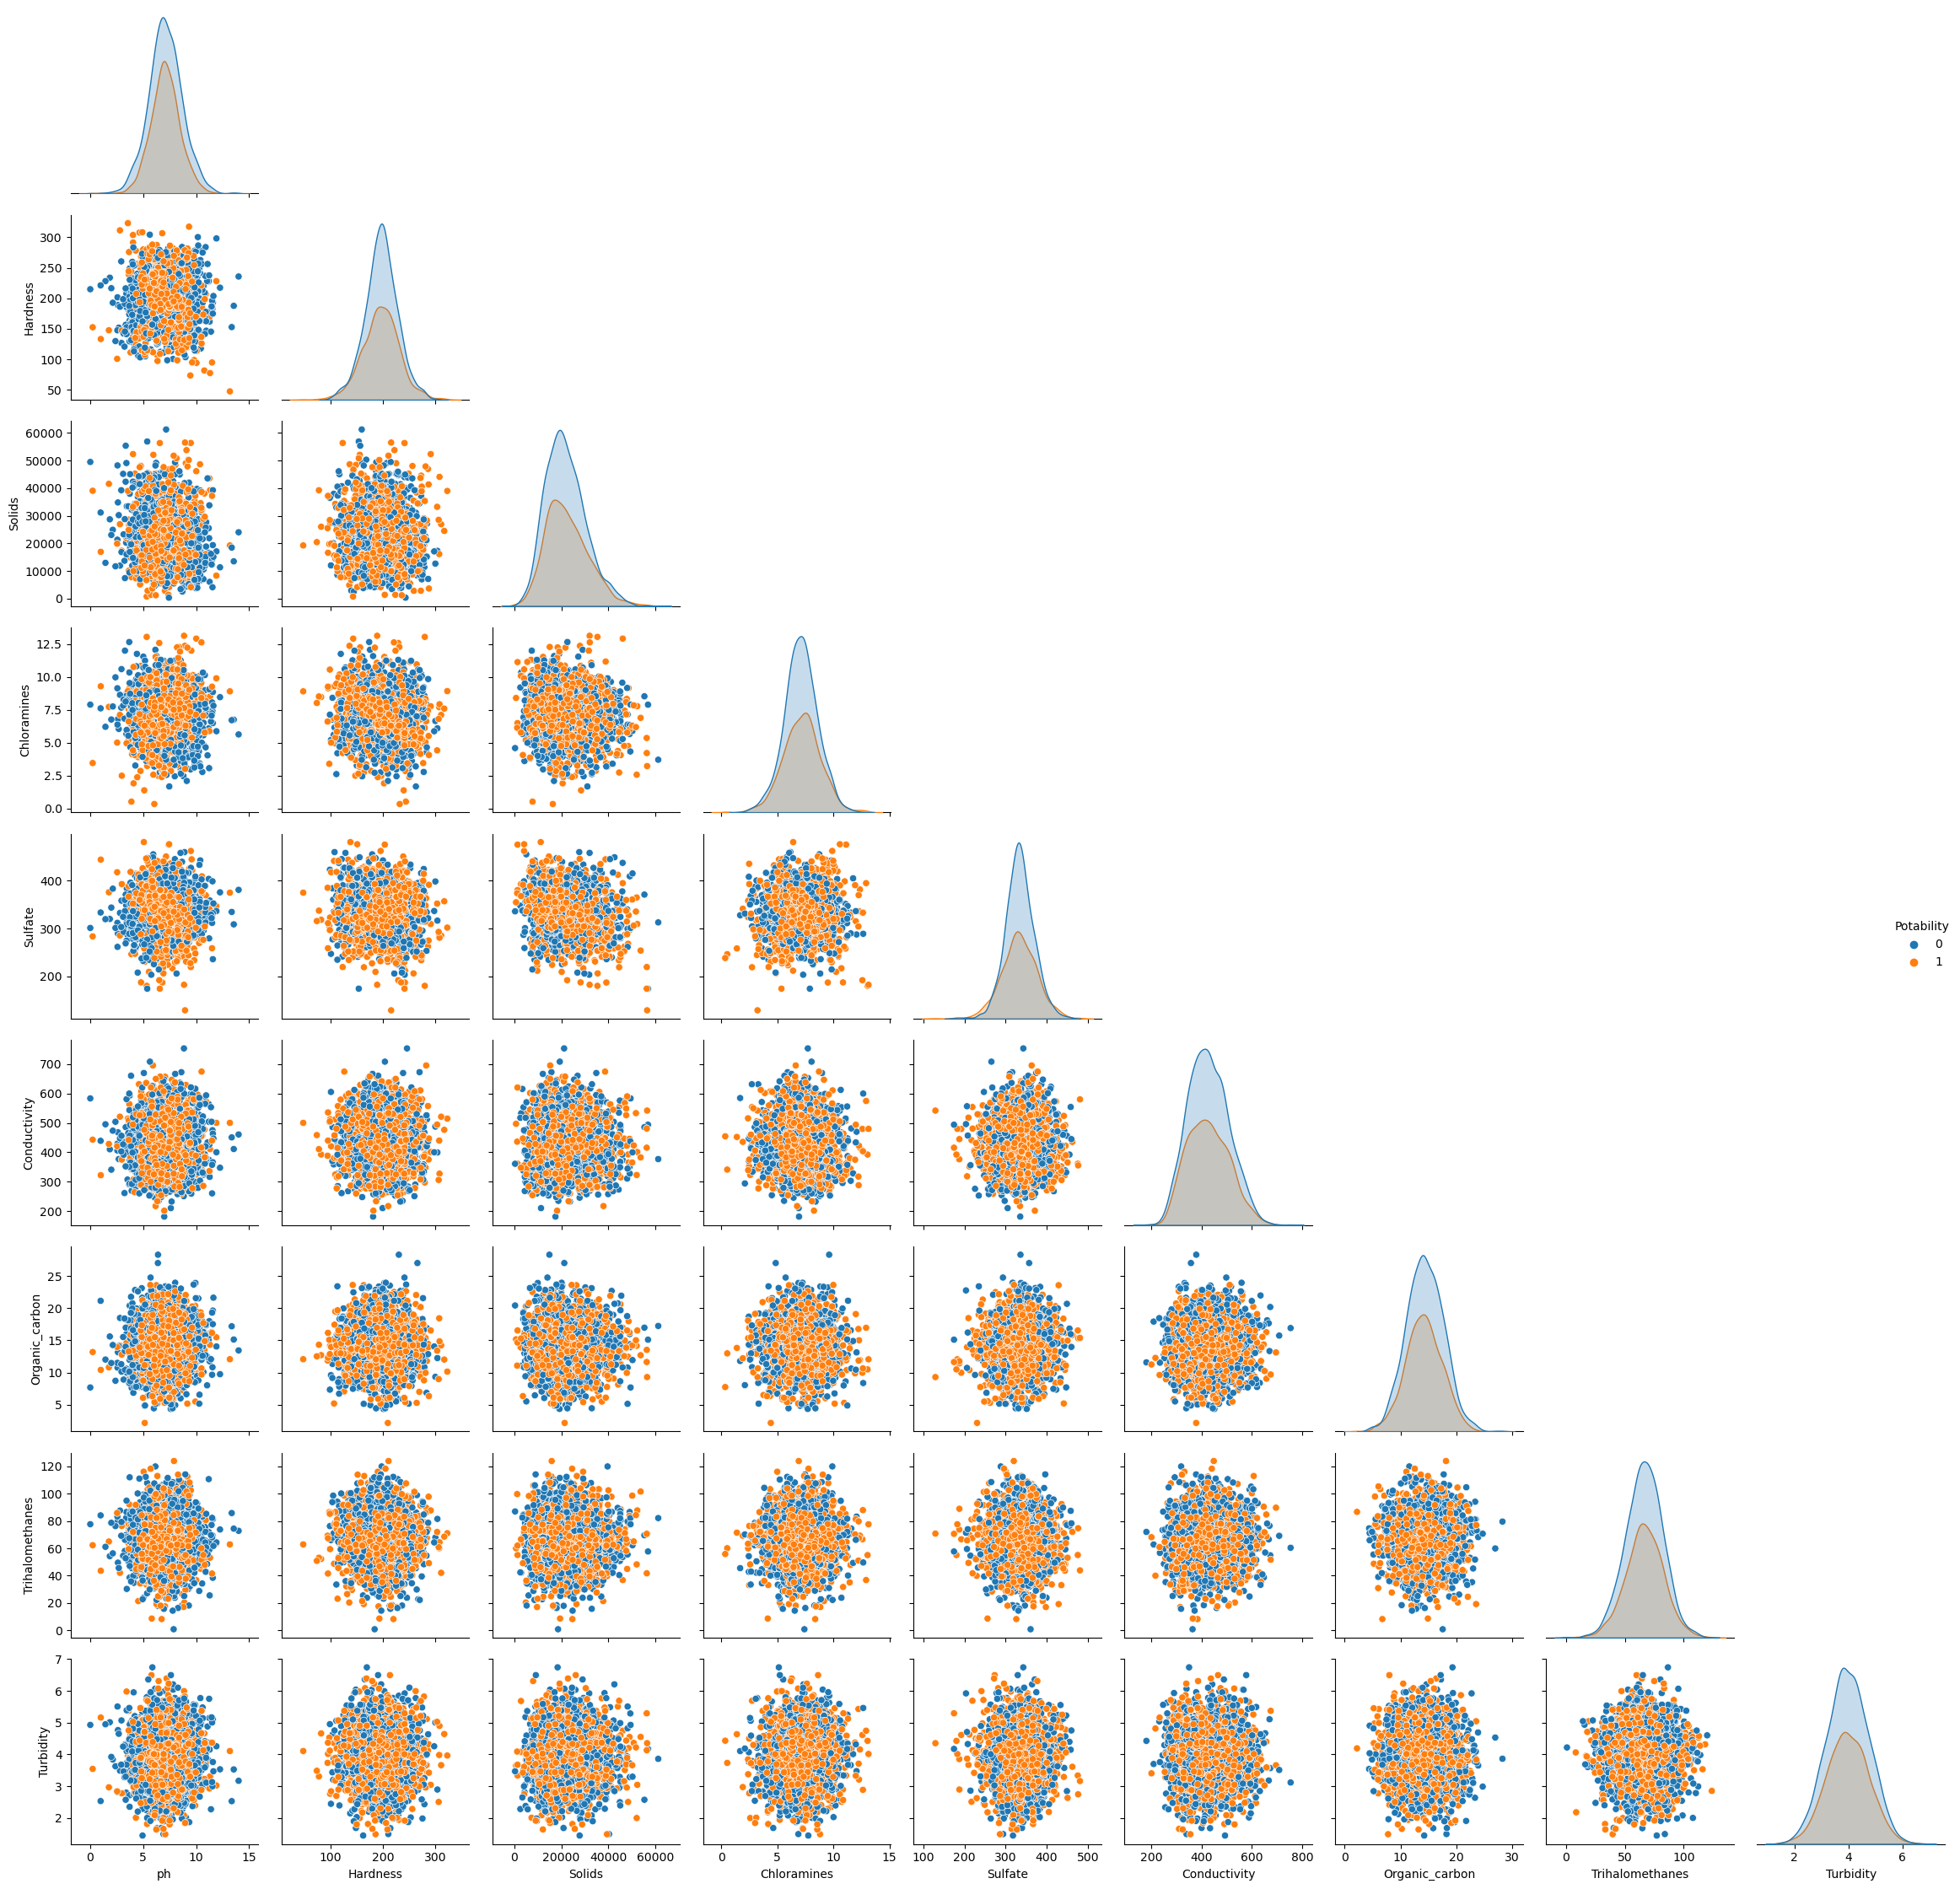

In [9]:
sns.pairplot(df, hue='Potability', corner=True)
plt.tight_layout()
plt.show()

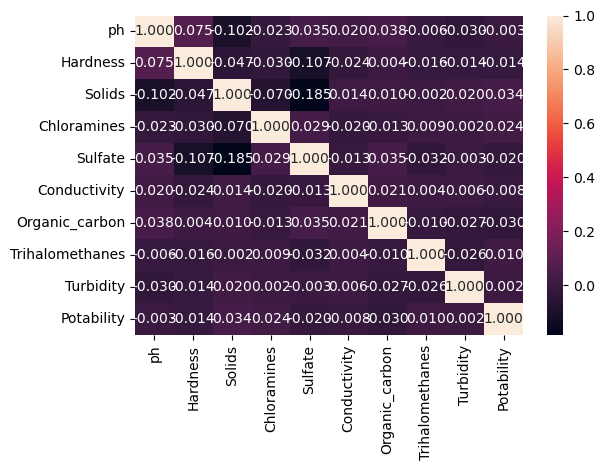

In [17]:
corr_matrix = df.corr()
sns.heatmap(data=corr_matrix, annot=True, fmt=".3f")
plt.tight_layout()